In [1]:
%run data_cleaning.py
df_cleaned.head()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (data_cleaning.py, line 14)

NameError: name 'df_cleaned' is not defined

In [ ]:
#random forest regression model for tumour size
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np



data1 = remove_outliers_tumor_size(df)
# data1=df.copy()
x = data1.drop(["Status", "Survival Months", "Tumor Size", "6th Stage", "T Stage", "Regional Node Examined"], axis=1)
y = data1["Tumor Size"]

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.1)


param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 3, 5, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    # 'max_leaf_nodes': [None, 10, 20, 30],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2],
    # 'oob_score': [True, False],
    # 'warm_start': [True, False],
    # 'ccp_alpha': [0.0, 0.1, 0.2],
    # 'max_samples': [None, 10, 20, 30],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
}

best_params_list={'n_estimators':[], 'max_depth':[], 'min_samples_split':[], 'min_samples_leaf':[], 'bootstrap':[], 'max_leaf_nodes':[], 'min_impurity_decrease':[], 'oob_score':[], 'warm_start':[], 'ccp_alpha':[], 'max_samples':[], 'criterion':[]}
for j in range(0, 5):
    rf = RandomForestRegressor(random_state=j)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                        cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)
    best_params = grid_search.best_params_
    print("Best parameters for iteration", j+1, ":", best_params)
    # Append the best parameters to the list
    for key in best_params.keys():
        best_params_list[key].append(best_params[key])
# Calculate the most popular best parameters

for key, values in best_params_list.items():
    try:
        mean = np.mean(values)
        # print(key, mean)
        best_params_list[key] = mean
    except TypeError:
        mode = max(set(values), key=values.count)
        best_params_list[key] = mode

print("Best parameters:", best_params_list)









        


NameError: name 'remove_outliers_tumor_size' is not defined

In [ ]:
rf = RandomForestRegressor(random_state=42, bootstrap=True, max_depth = 3, n_estimators=800, criterion='squared_error')

rf.fit(x_train, y_train)

y_val_pred = rf.predict(x_test)

mse_validation = mean_squared_error(y_test, y_val_pred)
r2_scores = r2_score(y_test, y_val_pred)

print("Mean Squared Error on Validation Set:", str(mse_validation) + " ((" + str((mse_validation)**0.5) +"))")
print("R^2 Score on Validation Set:", np.mean(r2_scores))

#13.955, 0.103(0.09147)
#13.995, .125
        

Mean Squared Error on Validation Set: 195.8822845817619 ((13.99579524649321))
R^2 Score on Validation Set: 0.12499048927738232


ValueError: x and y must be the same size

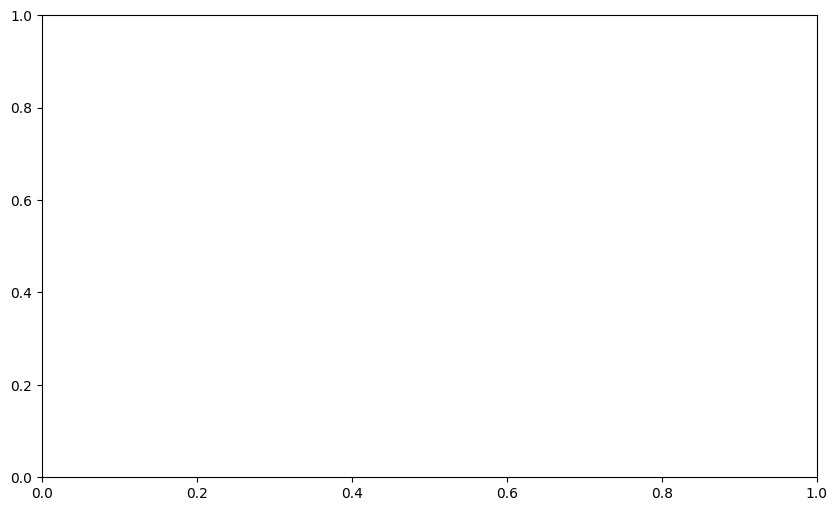

In [ ]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.title('Actual vs Predicted Tumor Size')
plt.xlabel('Actual Tumor Size')
plt.ylabel('Predicted Tumor Size')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#random forest regression model for Suriaval months (only for dead people)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)

#Input parameters = everything except survival months
data2 = df.copy()
data2 = data2[data2["Status"] == 0]
data2 = remove_outliers_survival_months(data2)


x = data2[['Estrogen Status', 'Progesterone Status', '6th Stage', 'Age']]
y = data2["Survival Months"]

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5)
# Use RandomForestRegressor for regression tasks

rf = RandomForestRegressor(random_state=42, n_estimators=1000, max_depth=5).fit(x_train, y_train)

# Making predictions based on the model
y_pred = rf.predict(x_test)
y_val_pred = rf.predict(x_val)


#Checking accuracy on validation set
mse_validation = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Set:", mse_validation,"(((", str(mse_validation**0.5) + "))")

y_test_pred = rf.predict(x_test)
#Checking accuracy on test set
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error on Test Set:", str(mse_test) + " ((" + str(mse_test**0.5) + "))")

# Getting feature importances
feature_importances = pd.DataFrame({'Feature': x.columns, 'Importance': rf.feature_importances_})

# Sorting features by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or display the feature importances
print("Feature Importances:")
print(feature_importances)


#original: V:276.417, T:267.399



Mean Squared Error on Validation Set: 279.38318566237393 ((( 16.714759515541164))
Mean Squared Error on Test Set: 264.8786045708709 ((16.275091538018177))
Feature Importances:
               Feature  Importance
3                  Age    0.576221
2            6th Stage    0.201637
1  Progesterone Status    0.127068
0      Estrogen Status    0.095074
